<a href="https://colab.research.google.com/github/LuisFelipeUrena/DS-Unit-2-Applied-Modeling/blob/master/Assignments/DS13_TL_BTR_LUIS_URENA_UNIT2_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [0]:
import pandas as pd
import numpy as np

In [0]:
data = 'https://raw.githubusercontent.com/LuisFelipeUrena/DS-Unit-2-Applied-Modeling/master/data/apartments/renthop-nyc.csv'
df = pd.read_csv(data)

In [39]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
df.tail()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
49347,1.0,2,2016-06-02 05:41:05,"30TH/3RD, MASSIVE CONV 2BR IN LUXURY FULL SERV...",E 30 St,40.7426,-73.9790,3200,230 E 30 St,medium,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
49348,1.0,1,2016-04-04 18:22:34,"HIGH END condo finishes, swimming pool, and ki...",Rector Pl,40.7102,-74.0163,3950,225 Rector Place,low,1,1,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
49349,1.0,1,2016-04-16 02:13:40,Large Renovated One Bedroom Apartment with Sta...,West 45th Street,40.7601,-73.9900,2595,341 West 45th Street,low,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49350,1.0,0,2016-04-08 02:13:33,Stylishly sleek studio apartment with unsurpas...,Wall Street,40.7066,-74.0101,3350,37 Wall Street,low,1,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49351,1.0,2,2016-04-12 02:48:07,Look no further!!! This giant 2 bedroom apart...,Park Terrace East,40.8699,-73.9172,2200,30 Park Terrace East,low,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
df.isnull().sum()

bathrooms                  0
bedrooms                   0
created                    0
description             1446
display_address          135
latitude                   0
longitude                  0
price                      0
street_address            10
interest_level             0
elevator                   0
cats_allowed               0
hardwood_floors            0
dogs_allowed               0
doorman                    0
dishwasher                 0
no_fee                     0
laundry_in_building        0
fitness_center             0
pre-war                    0
laundry_in_unit            0
roof_deck                  0
outdoor_space              0
dining_room                0
high_speed_internet        0
balcony                    0
swimming_pool              0
new_construction           0
terrace                    0
exclusive                  0
loft                       0
garden_patio               0
wheelchair_access          0
common_outdoor_space       0
dtype: int64

In [42]:
df.describe(include='number')

,bathrooms,bedrooms,latitude,longitude,price,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
count,49352.00000,49352.000000,49352.000000,49352.000000,4.935200e+04,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000,49352.00000
mean,1.21218,1.541640,40.741545,-73.955716,3.830174e+03,0.525126,0.476982,0.476759,0.446486,0.424887,0.413965,0.365983,0.052541,0.268520,0.185423,0.177055,0.132821,0.138677,0.104089,0.087190,0.060686,0.055357,0.051852,0.046847,0.043929,0.042612,0.039370,0.027517,0.02620
std,0.50142,1.115018,0.638535,1.177912,2.206687e+04,0.499373,0.499475,0.499465,0.497133,0.494331,0.492547,0.481710,0.223117,0.443194,0.388644,0.381719,0.339385,0.345613,0.305379,0.282116,0.238757,0.228679,0.221730,0.211313,0.204940,0.201983,0.194476,0.163585,0.15973
min,0.00000,0.000000,0.000000,-118.271000,4.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.00000,1.000000,40.728300,-73.991700,2.500000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.00000,1.000000,40.751800,-73.977900,3.150000e+03,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.00000,2.000000,40.774300,-73.954800,4.100000e+03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10.00000,8.000000,44.883500,0.000000,4.490000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [43]:
df.describe(exclude='number')

,created,description,display_address,street_address,interest_level
count,49352,47906,49217,49342,49352
unique,48675,38243,8825,15357,3
top,2016-06-16 04:08:35,,Broadway,3333 Broadway,low
freq,3,1647,438,174,34284


In [44]:
df.shape

(49352, 34)

In [45]:
df['interest_level'].describe()

count     49352
unique        3
top         low
freq      34284
Name: interest_level, dtype: object

In [46]:
#mayority class, the target i am trying to predict is intrest level
df['interest_level'].value_counts(normalize=True)

low       0.694683
medium    0.227529
high      0.077788
Name: interest_level, dtype: float64

In [0]:
#irrelevant columns putting them here just in case i want to drop others
irrelevant = ['created','description','display_address','street_address','latitude','longitude']

In [0]:
df = df.drop(irrelevant,axis=1)


In [49]:

print('Shape',df.shape)
df.head()

Shape (49352, 28)


,bathrooms,bedrooms,price,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,3000,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,5465,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2850,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,3275,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,3350,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#feature engineering the allowance of dogs and cats
cats_and_dogs = df['cats_allowed'] & df['dogs_allowed']
df['cats_and_dogs'] = cats_and_dogs

In [0]:
df['no_pets'] = cats_and_dogs == 0

In [52]:
df.head()

,bathrooms,bedrooms,price,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space,cats_and_dogs,no_pets
0,1.5,3,3000,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
1,1.0,2,5465,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False
2,1.0,1,2850,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
3,1.0,1,3275,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
4,1.0,4,3350,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True


In [56]:
df.isnull().sum()

bathrooms               0
bedrooms                0
price                   0
interest_level          0
elevator                0
cats_allowed            0
hardwood_floors         0
dogs_allowed            0
doorman                 0
dishwasher              0
no_fee                  0
laundry_in_building     0
fitness_center          0
pre-war                 0
laundry_in_unit         0
roof_deck               0
outdoor_space           0
dining_room             0
high_speed_internet     0
balcony                 0
swimming_pool           0
new_construction        0
terrace                 0
exclusive               0
loft                    0
garden_patio            0
wheelchair_access       0
common_outdoor_space    0
cats_and_dogs           0
no_pets                 0
dtype: int64

In [0]:
target = ['interest_level']



In [0]:
from sklearn.model_selection import train_test_split

In [57]:
#split the data into test train val, by random sampling
train , test = train_test_split(df,train_size=0.80,test_size=0.20,
                                random_state=42
                            )
train.shape , test.shape

((39481, 30), (9871, 30))

In [0]:
train , val = train_test_split(train,train_size=0.80,test_size=0.20,
                               random_state=42)

In [59]:
# i ran this command to get a list of all features tu use them as features for my set
#test.columns.drop(target)

Index(['bathrooms', 'bedrooms', 'price', 'elevator', 'cats_allowed',
       'hardwood_floors', 'dogs_allowed', 'doorman', 'dishwasher', 'no_fee',
       'laundry_in_building', 'fitness_center', 'pre-war', 'laundry_in_unit',
       'roof_deck', 'outdoor_space', 'dining_room', 'high_speed_internet',
       'balcony', 'swimming_pool', 'new_construction', 'terrace', 'exclusive',
       'loft', 'garden_patio', 'wheelchair_access', 'common_outdoor_space',
       'cats_and_dogs', 'no_pets'],
      dtype='object')

In [0]:
features = ['bathrooms', 'bedrooms', 'price', 'elevator', 'cats_allowed',
       'hardwood_floors', 'dogs_allowed', 'doorman', 'dishwasher', 'no_fee',
       'laundry_in_building', 'fitness_center', 'pre-war', 'laundry_in_unit',
       'roof_deck', 'outdoor_space', 'dining_room', 'high_speed_internet',
       'balcony', 'swimming_pool', 'new_construction', 'terrace', 'exclusive',
       'loft', 'garden_patio', 'wheelchair_access', 'common_outdoor_space',
       'cats_and_dogs', 'no_pets'] 

In [0]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[target]

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline



In [0]:
pipeline = make_pipeline(
    RandomForestClassifier(max_depth=10)
)

In [64]:
pipeline.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Pipeline(memory=None,
         steps=[('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=10, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [66]:
pipeline.score(X_val,y_val)

0.7030517918196784

In [0]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_distribution = {'randomforestclassifier__max_depth':[10,100,300,400],
                       'randomforestclassifier__max_features':range(10,30),
                       'randomforestclassifier__criterion':['gini','entropy']}


In [0]:
search = RandomizedSearchCV(
     pipeline, 
    param_distributions=param_distribution, 
    n_iter=5, 
    cv=3, 
    scoring='accuracy', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1
)

In [73]:
search.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   43.9s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('randomforestclassifier',
                                              RandomForestClassifier(bootstrap=True,
                                                                     ccp_alpha=0.0,
                                                                     class_weight=None,
                                                                     criterion='gini',
                                                                     max_depth=10,
                                                                     max_features='auto',
                                                                     max_leaf_nodes=None,
                                                                     max_samples=None,
                                                                     min_impurity_decrease=0.0,
                                             

In [0]:
pipeline = search.best_estimator_

In [75]:
pipeline.score(X_val,y_val)

0.7111561352412309

In [0]:
import seaborn as sns

In [0]:
y = df['interest_level'].value_counts(normalize=True)

In [79]:
y


low       0.694683
medium    0.227529
high      0.077788
Name: interest_level, dtype: float64

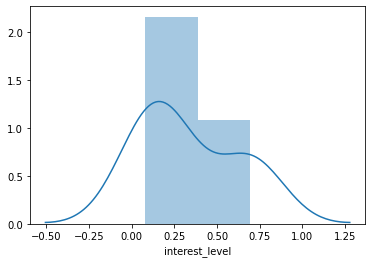

In [78]:
sns.distplot(y)

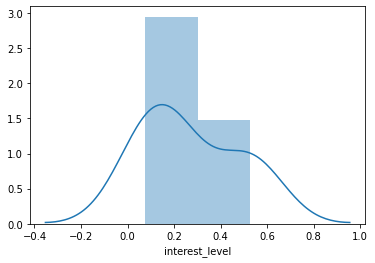

In [85]:
y_log = np.log1p(y)
sns.distplot(y_log)

In [86]:
search.best_estimator_

Pipeline(memory=None,
         steps=[('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='entropy',
                                        max_depth=10, max_features=26,
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [0]:
from sklearn.metrics import classification_report

y_tpred = pipeline.predict(X_test)
classification_report(y_val,y_tpred)